# **Dicoding Project Sentiment Analysis For NLP - APK PlayStore Duolingo**

- Nama : Meysi Supmawati
- ID_Dicoding (user) :
meysi supmawati
- Kelas : Belajar Pengembangan Machine Learning (Proyek Pertama)

## Loading Dataset

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# Baca file CSV dari Google Drive
df = pd.read_csv('/content/drive/MyDrive/duolingo_reviews_full.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,16ce7b94-6afd-47b2-b891-ceb22dae8fad,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Duolinggo bagus untuk belajar bahasa inggris, ...",3,0,NaN,2025-01-19 04:38:47,NaN,NaN,NaN
1,00c04b57-bc16-4e05-8de3-21fab1d33693,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,THIS IS VERY COOL! NOW I KNOW JAPANESE LANGUAGE!,5,0,6.13.5,2025-01-19 04:37:57,NaN,NaN,6.13.5
2,67914a3c-4c8f-4fcd-8ad7-6566e33aede7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game sangat seru bagi semua orang,5,0,6.13.5,2025-01-19 04:28:09,NaN,NaN,6.13.5
3,c653f66c-ccff-44ca-8bf3-84a06a1b2a90,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus ..,5,0,6.13.5,2025-01-19 04:27:58,NaN,NaN,6.13.5
4,5234f242-016a-417b-b756-1cf2b4609199,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,good,5,0,5.83.4,2025-01-19 04:21:00,NaN,NaN,5.83.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              10000 non-null  object 
 1   userName              10000 non-null  object 
 2   userImage             10000 non-null  object 
 3   content               10000 non-null  object 
 4   score                 10000 non-null  int64  
 5   thumbsUpCount         10000 non-null  int64  
 6   reviewCreatedVersion  8861 non-null   object 
 7   at                    10000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            8861 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


In [ ]:
# Ambil hanya kolom 'content' dan 'score', kemudian rename kolom menjadi 'rating' dan 'review'
df = df[['content','score']]  # Ambil hanya kolom score dan content
df.columns = ['review', 'rating']  # Rename kolom untuk lebih jelas

# Tampilkan data yang sudah dibersihkan
print(df.head())

                                              review  rating
0  Duolinggo bagus untuk belajar bahasa inggris, ...       3
1   THIS IS VERY COOL! NOW I KNOW JAPANESE LANGUAGE!       5
2                  game sangat seru bagi semua orang       5
3                                           bagus ..       5
4                                               good       5


## Preprocessing Text

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
# Import library untuk preprocessing teks
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import spacy

In [ ]:
# Download stopwords dan wordnet untuk lemmatization jika belum ada
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Inisialisasi objek untuk lemmatization
lemmatizer = WordNetLemmatizer()

# Inisialisasi objek Sastrawi Stemmer dan StopWordRemover
factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

factory_stopwords = StopWordRemoverFactory()
sastrawi_stopwords = set(factory_stopwords.get_stop_words())

# Custom stopwords tambahan
custom_stopwords = sastrawi_stopwords | {'ini', 'itu', 'juga', 'saya', 'sy', 'jg', 'ga', 'sih', 'lagi', 'gak', 'yg', 'yang', 'di',
                                         'kita', 'untuk', 'kalo', 'kalau', 'kek', 'kayak', 'dan', 'ya', 'iya', 'y', 'nya', 'lagi',
                                         'terus', 'aku', 'kan', 'di', 'deh', 'ku', 'you', 'kalian', 'mau', 'sama', 'buat', 'i', 'it',
                                         'aja', 'to', 'the', 'pa', 'dong', 'duolingo', 'is', 'apa', 'ajar', 'jadi', 'karena', 'karna',
                                         'pake', 'kok'}

In [ ]:
# Fungsi untuk preprocessing teks dengan Sastrawi
def preprocess_text_with_sastrawi_and_custom_stopwords(text):
    # Case folding
    text = text.lower()

    # Removal special characters (hanya huruf dan spasi)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenizing
    tokens = word_tokenize(text)

    # Stopword removal dengan custom stopwords
    tokens = [word for word in tokens if word not in custom_stopwords]

    # Stemming dengan Sastrawi
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization (gunakan NLTK atau spaCy, tergantung preferensi)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Terapkan preprocessing dengan Sastrawi dan custom stopwords
df['review_preprocessed'] = df['review'].apply(preprocess_text_with_sastrawi_and_custom_stopwords)

## Mengonversi rating menjadi kategori sentimen

In [ ]:
# Fungsi untuk mengubah rating angka menjadi kategori
def map_rating_to_category(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'netral'
    else:
        return 'positive'

# Terapkan fungsi ke kolom rating untuk membuat kolom baru 'rating_category'
df['rating_category'] = df['rating'].apply(map_rating_to_category)

# Tampilkan data dengan rating kategori baru
print(df[['rating', 'rating_category']].head())

   rating rating_category
0       3          netral
1       5        positive
2       5        positive
3       5        positive
4       5        positive


## Visualisasi WordCloud

In [ ]:
# Import library untuk visualisasi wordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

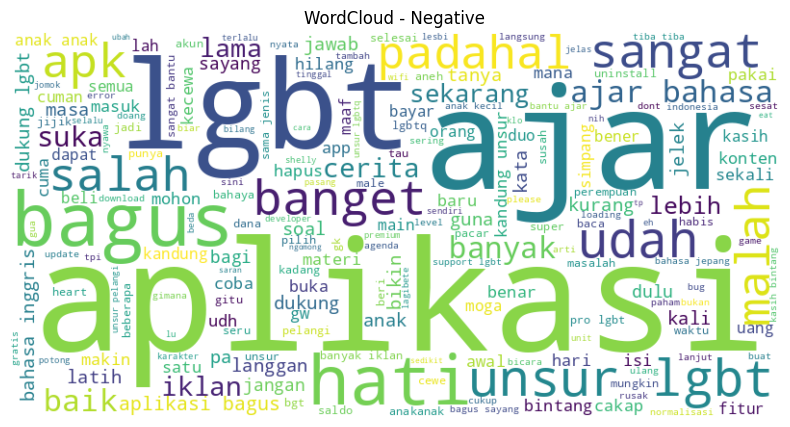

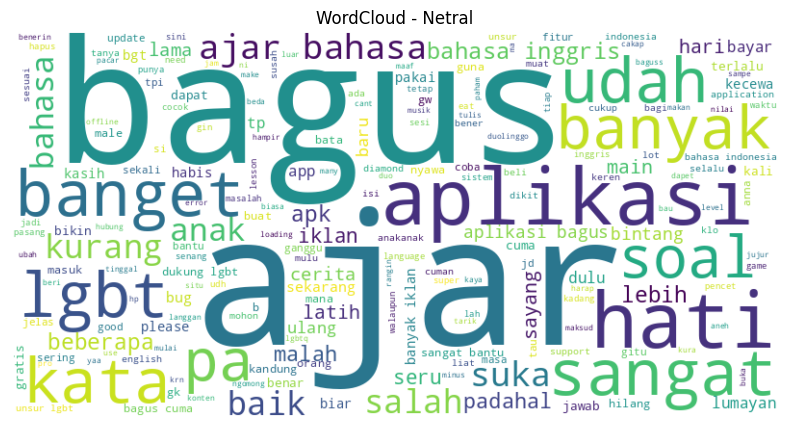

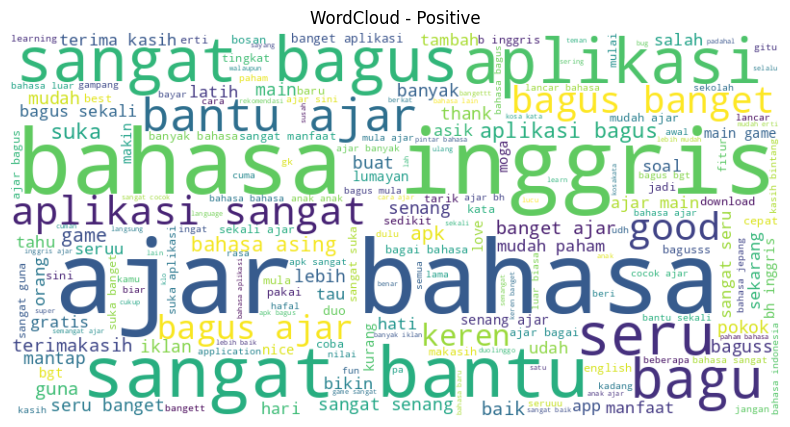

In [ ]:
# Fungsi untuk menghasilkan WordCloud berdasarkan rating
def generate_wordcloud_by_rating(df, rating):
    # Filter dataset berdasarkan rating kategori
    filtered_reviews = df[df['rating_category'] == rating]['review_preprocessed']
    text = ' '.join(filtered_reviews)

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Tampilkan WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud - {rating.capitalize()}")
    plt.axis('off')
    plt.show()

# Visualisasi WordCloud untuk masing-masing kategori rating
generate_wordcloud_by_rating(df, 'negative')  # Untuk rating kategori negatif
generate_wordcloud_by_rating(df, 'netral')   # Untuk rating kategori netral
generate_wordcloud_by_rating(df, 'positive')  # Untuk rating kategori positif

## Ekstraksi Fitur

TF-IDF menggunakan TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Batas 5000 fitur untuk efisiensi

# Transformasikan data preprocessed
X_tfidf = tfidf.fit_transform(df['review_preprocessed']).toarray()

# Simpan hasil ekstraksi fitur
print("Shape of TF-IDF features:", X_tfidf.shape)

Shape of TF-IDF features: (10000, 5000)


Word2Vec menggunakan gensim

In [ ]:
import numpy as np
from gensim.models import Word2Vec

# Tokenize teks menjadi daftar kata-kata
tokenized_reviews = df['review_preprocessed'].apply(word_tokenize)

# Latih model Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)

# Rata-rata embedding untuk setiap review
X_word2vec = tokenized_reviews.apply(
    lambda tokens: np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv] or [np.zeros(100)], axis=0)
)

# Konversi ke array
X_word2vec = np.array(X_word2vec.tolist())
print("Shape of Word2Vec features:", X_word2vec.shape)


Shape of Word2Vec features: (10000, 100)


## Pembagian Data

In [ ]:
from sklearn.model_selection import train_test_split

# Label target
y = df['rating_category']

# Skema pembagian data
# TF-IDF - 80/20 Split
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Word2Vec - 70/30 Split
X_train_word2vec, X_test_word2vec, y_train_w2v, y_test_w2v = train_test_split(X_word2vec, y, test_size=0.3, random_state=42)

print("Shape of training data (TF-IDF):", X_train_tfidf.shape)
print("Shape of training data (Word2Vec):", X_train_word2vec.shape)

Shape of training data (TF-IDF): (8000, 5000)
Shape of training data (Word2Vec): (7000, 100)


Model LSTM dengan TF-IDF (80/20)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding

# Model LSTM
model_tfidf = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 kelas: positive, neutral, negative
])

model_tfidf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# One-hot encoding untuk target
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Training model
history_tfidf_lstm = model_tfidf.fit(X_train_tfidf, y_train_encoded, validation_data=(X_test_tfidf, y_test_encoded), epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8855 - loss: 0.5477 - val_accuracy: 0.9125 - val_loss: 0.2607
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9397 - loss: 0.1947 - val_accuracy: 0.9230 - val_loss: 0.2521
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9581 - loss: 0.1486 - val_accuracy: 0.9205 - val_loss: 0.2715
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9647 - loss: 0.1127 - val_accuracy: 0.9190 - val_loss: 0.2970
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9769 - loss: 0.0890 - val_accuracy: 0.9180 - val_loss: 0.3207
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9861 - loss: 0.0675 - val_accuracy: 0.9155 - val_loss: 0.3696
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9856 - loss: 0.0680 - val_accuracy: 0.9135 - val_loss: 0.3955
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9918 - loss: 0.0467 - val_accu

In [ ]:
print(f"Final Training Accuracy: {history_tfidf_lstm.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history_tfidf_lstm.history['val_accuracy'][-1]}")

Final Training Accuracy: 0.9907500147819519
Final Validation Accuracy: 0.9135000109672546


Model GRU dengan TF-IDF (80/20)

In [ ]:
from tensorflow.keras.layers import GRU

# Model GRU dengan TF-IDF
model_tfidf_gru = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 kelas: positive, neutral, negative
])

model_tfidf_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
history_tfidf_gru = model_tfidf_gru.fit(
    X_train_tfidf, y_train_encoded,
    validation_data=(X_test_tfidf, y_test_encoded),
    epochs=10, batch_size=32
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8858 - loss: 0.5339 - val_accuracy: 0.9080 - val_loss: 0.2685
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9392 - loss: 0.2079 - val_accuracy: 0.9205 - val_loss: 0.2606
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9536 - loss: 0.1554 - val_accuracy: 0.9210 - val_loss: 0.2687
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9629 - loss: 0.1252 - val_accuracy: 0.9170 - val_loss: 0.2938
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9775 - loss: 0.0866 - val_accuracy: 0.9150 - val_loss: 0.3236
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9838 - loss: 0.0698 - val_accuracy: 0.9135 - val_loss: 0.3467
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9909 - loss: 0.0550 - val_accuracy: 0.9120 - val_loss: 0.3839
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9910 - loss: 0.0485 - val_accu

In [ ]:
print(f"Final Training Accuracy: {history_tfidf_gru.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history_tfidf_gru.history['val_accuracy'][-1]}")

Final Training Accuracy: 0.9909999966621399
Final Validation Accuracy: 0.9125000238418579


Model SVM dengan dengan TF-IDF (80/20)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# Inisialisasi model SVM
svm_model = LinearSVC()

# Latih model SVM
svm_model.fit(X_train_tfidf, y_train)

# Prediksi dengan model SVM
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluasi model SVM
print("TF-IDF + SVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

TF-IDF + SVM Model Evaluation:
              precision    recall  f1-score   support

    negative       0.74      0.47      0.58       157
      netral       0.27      0.04      0.07        69
    positive       0.93      0.99      0.96      1774

    accuracy                           0.92      2000
   macro avg       0.65      0.50      0.54      2000
weighted avg       0.89      0.92      0.90      2000



In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model SVM
svm_model = LinearSVC()

# Latih model SVM
svm_model.fit(X_train_tfidf, y_train)

# Prediksi dengan model SVM
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluasi akurasi pada data testing
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi Model SVM pada Testing Set: {accuracy * 100:.2f}%")

# Menampilkan classification report untuk evaluasi lebih lanjut
print("Classification Report for TF-IDF + SVM:")
print(classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))


Akurasi Model SVM pada Testing Set: 91.70%
Classification Report for TF-IDF + SVM:
              precision    recall  f1-score   support

    negative       0.74      0.47      0.58       157
      netral       0.27      0.04      0.07        69
    positive       0.93      0.99      0.96      1774

    accuracy                           0.92      2000
   macro avg       0.65      0.50      0.54      2000
weighted avg       0.89      0.92      0.90      2000



Model Random Forest dengan TF-IDF (80/20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model Random Forest
rf_model.fit(X_train_tfidf, y_train)

# Prediksi dengan model RF
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluasi model RF
print("TF-IDF + Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

TF-IDF + Random Forest Model Evaluation:
              precision    recall  f1-score   support

    negative       0.76      0.45      0.57       157
      netral       0.00      0.00      0.00        69
    positive       0.92      0.99      0.96      1774

    accuracy                           0.92      2000
   macro avg       0.56      0.48      0.51      2000
weighted avg       0.88      0.92      0.89      2000



Model LSTM dengan Word2Vec (70/30)

In [ ]:
# Model LSTM
model_word2vec_lstm = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_word2vec.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_word2vec_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Encode target labels
y_train_word2vec_encoded = label_encoder.fit_transform(y_train_w2v)
y_test_word2vec_encoded = label_encoder.transform(y_test_w2v)

# Training model
history_word2vec_lstm = model_word2vec_lstm.fit(
    X_train_word2vec, y_train_word2vec_encoded,
    validation_data=(X_test_word2vec, y_test_word2vec_encoded),
    epochs=10, batch_size=32
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8611 - loss: 0.4900 - val_accuracy: 0.8927 - val_loss: 0.3328
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9057 - loss: 0.3189 - val_accuracy: 0.8973 - val_loss: 0.3377
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8984 - loss: 0.3258 - val_accuracy: 0.8970 - val_loss: 0.3177
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9014 - loss: 0.3157 - val_accuracy: 0.8980 - val_loss: 0.3159
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9037 - loss: 0.2992 - val_accuracy: 0.8977 - val_loss: 0.3135
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9050 - loss: 0.3122 - val_accuracy: 0.9013 - val_loss: 0.3208
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9070 - loss: 0.3012 - val_accuracy: 0.9013 - val_loss: 0.3189
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9054 - loss: 0.2965 - val_accuracy: 0.9023 - val_

In [ ]:
print(f"Final Training Accuracy: {history_word2vec_lstm.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history_word2vec_lstm.history['val_accuracy'][-1]}")

Final Training Accuracy: 0.9067142605781555
Final Validation Accuracy: 0.9013333320617676


Model GRU dengan Word2Vec (70/30)

In [ ]:
# Model GRU
model_word2vec_gru = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_word2vec.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model_word2vec_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
history_word2vec_gru = model_word2vec_gru.fit(
    X_train_word2vec, y_train_word2vec_encoded,
    validation_data=(X_test_word2vec, y_test_word2vec_encoded), epochs=10, batch_size=32
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8558 - loss: 0.5167 - val_accuracy: 0.8927 - val_loss: 0.3305
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9009 - loss: 0.3293 - val_accuracy: 0.8983 - val_loss: 0.3372
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9007 - loss: 0.3163 - val_accuracy: 0.8970 - val_loss: 0.3206
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8986 - loss: 0.3210 - val_accuracy: 0.8997 - val_loss: 0.3155
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9064 - loss: 0.2992 - val_accuracy: 0.9007 - val_loss: 0.3147
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9122 - loss: 0.2937 - val_accuracy: 0.9057 - val_loss: 0.3105
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9085 - loss: 0.3071 - val_accuracy: 0.8977 - val_loss: 0.3206
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9046 - loss: 0.2986 - val_accuracy: 0.9017 - val_

In [ ]:
print(f"Final Training Accuracy: {history_word2vec_gru.history['accuracy'][-1]}")
print(f"Final Validation Accuracy: {history_word2vec_gru.history['val_accuracy'][-1]}")

Final Training Accuracy: 0.9082857370376587
Final Validation Accuracy: 0.9026666879653931


Model SVM dengan Word2Vec (70/30)

In [ ]:
# Inisialisasi model SVM
svm_model_word2vec = LinearSVC()

# Latih model SVM dengan Word2Vec
svm_model_word2vec.fit(X_train_word2vec, y_train_word2vec_encoded)

# Prediksi dengan model SVM
y_pred_svm_word2vec = svm_model_word2vec.predict(X_test_word2vec)

# Evaluasi model SVM
print("Word2Vec + SVM Model Evaluation:")
print(classification_report(y_test_word2vec_encoded, y_pred_svm_word2vec, target_names=label_encoder.classes_))


Word2Vec + SVM Model Evaluation:
              precision    recall  f1-score   support

    negative       0.72      0.21      0.33       222
      netral       0.00      0.00      0.00       100
    positive       0.91      1.00      0.95      2678

    accuracy                           0.90      3000
   macro avg       0.54      0.40      0.43      3000
weighted avg       0.86      0.90      0.87      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Random Forest dengan Word2Vec (70/30)

In [ ]:
# Inisialisasi model Random Forest
rf_model_word2vec = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model RF dengan Word2Vec
rf_model_word2vec.fit(X_train_word2vec, y_train_word2vec_encoded)

# Prediksi dengan model RF
y_pred_rf_word2vec = rf_model_word2vec.predict(X_test_word2vec)

# Evaluasi model RF
print("Word2Vec + Random Forest Model Evaluation:")
print(classification_report(y_test_word2vec_encoded, y_pred_rf_word2vec, target_names=label_encoder.classes_))


Word2Vec + Random Forest Model Evaluation:
              precision    recall  f1-score   support

    negative       0.62      0.36      0.46       222
      netral       0.38      0.03      0.06       100
    positive       0.92      0.99      0.96      2678

    accuracy                           0.91      3000
   macro avg       0.64      0.46      0.49      3000
weighted avg       0.88      0.91      0.89      3000



## Inference

In [ ]:
## Inference untuk Semua Model

# Preprocessing teks untuk review baru
def preprocess_review_for_inference(review):
    # Preprocess sesuai pipeline
    review = review.lower()
    review = re.sub(r'[^a-z\s]', '', review)
    tokens = word_tokenize(review)
    tokens = [word for word in tokens if word not in custom_stopwords]
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Fungsi untuk melakukan inference
def make_prediction(review, model_type, model_name):
    # Preprocess the review
    preprocessed_review = preprocess_text_with_sastrawi_and_custom_stopwords(review)

    # Transform the preprocessed review based on model type
    if model_type == 'tfidf':
        transformed_review = tfidf.transform([preprocessed_review]).toarray()
    elif model_type == 'word2vec':
        tokenized_review = word_tokenize(preprocessed_review)
        transformed_review = np.mean(
            [word2vec_model.wv[word] for word in tokenized_review if word in word2vec_model.wv] or [np.zeros(100)],
            axis=0
        ).reshape(1, -1)
    else:
        raise ValueError("Invalid model type. Choose 'tfidf' or 'word2vec'.")

    # Make prediction
    if isinstance(model_name, Sequential):  # Check if model is a deep learning model
        prediction = model_name.predict(transformed_review)
        predicted_class = np.argmax(prediction, axis=1)  # Get the class with highest probability
    else:  # For SVM and Random Forest
        predicted_class = model_name.predict(transformed_review)

    # Debugging: Log predicted class
    print("Predicted Class (Integer):", predicted_class)

    # Ensure Label Encoder is properly trained
    if not hasattr(label_encoder, 'classes_'):
        label_encoder.fit(['negative', 'neutral', 'positive'])
        print("Label Encoder classes:", label_encoder.classes_)

    # Convert predicted class (integer) back to label using label_encoder
    predicted_label = label_encoder.inverse_transform(predicted_class)

    return predicted_label[0]

# Contoh review baru untuk prediksi
new_review = "Aplikasi ini sangat membantu saya belajar bahasa baru!"

# Tampilkan teks yang diuji
print(f"Teks: {new_review}")

print("TF-IDF + LSTM:", make_prediction(new_review, model_type='tfidf', model_name=model_tfidf))
print("TF-IDF + GRU:", make_prediction(new_review, model_type='tfidf', model_name=model_tfidf_gru))
# print("TF-IDF + SVM:", make_prediction(new_review, model_type='tfidf', model_name=svm_model))
# print("TF-IDF + Random Forest:", make_prediction(new_review, model_type='tfidf', model_name=rf_model))
print("Word2Vec + LSTM:", make_prediction(new_review, model_type='word2vec', model_name=model_word2vec_lstm))
print("Word2Vec + GRU:", make_prediction(new_review, model_type='word2vec', model_name=model_word2vec_gru))
# print("Word2Vec + SVM:", make_prediction(new_review, model_type='word2vec', model_name=svm_model_word2vec))
# print("Word2Vec + Random Forest:", make_prediction(new_review, model_type='word2vec', model_name=rf_model_word2vec))


Teks: Aplikasi ini sangat membantu saya belajar bahasa baru!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Predicted Class (Integer): [2]
TF-IDF + LSTM: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted Class (Integer): [2]
TF-IDF + GRU: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Class (Integer): [2]
Word2Vec + LSTM: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Class (Integer): [2]
Word2Vec + GRU: positive


In [ ]:
# Contoh review baru untuk prediksi
reviews = [
    ("Aplikasi ini sangat membantu saya belajar bahasa baru!", 4), # Positif
    ("Kecewa karena ternyata duolingo ini membawa misi pro pada LGBT....saya menemukan sendiri di chapter test membaca yang berjudul honeymoon...", 1), # Negatif
    ("Bagus tapi mines iklan mulu", 3)  # Netral
]

# Fungsi untuk menampilkan prediksi untuk setiap review dengan rating
def display_predictions_for_all_reviews(reviews):
    for review, rating in reviews:
        print(f"Teks: {review} | Rating: {rating}")
        print("TF-IDF + LSTM:", make_prediction(review, model_type='tfidf', model_name=model_tfidf))
        print("TF-IDF + GRU:", make_prediction(review, model_type='tfidf', model_name=model_tfidf_gru))
        print("Word2Vec + LSTM:", make_prediction(review, model_type='word2vec', model_name=model_word2vec_lstm))
        print("Word2Vec + GRU:", make_prediction(review, model_type='word2vec', model_name=model_word2vec_gru))
        print("-" * 50)  # Separator antara review

# Menampilkan prediksi untuk semua review
display_predictions_for_all_reviews(reviews)

Teks: Aplikasi ini sangat membantu saya belajar bahasa baru! | Rating: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
TF-IDF + LSTM: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
TF-IDF + GRU: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Word2Vec + LSTM: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Word2Vec + GRU: positive
--------------------------------------------------
Teks: Kecewa karena ternyata duolingo ini membawa misi pro pada LGBT....saya menemukan sendiri di chapter test membaca yang berjudul honeymoon... | Rating: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
TF-IDF + LSTM: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
TF-IDF + GRU: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Word2Vec + LSTM: positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Word2Vec + GRU: positive
--------------------------------------------------
Teks: Bagus tapi mines iklan mulu | Rating: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
TF-IDF + LSTM: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
TF-IDF + GRU: neutr

inference dari dataset

In [ ]:
#Model LSTM dengan TF-IDF (80/20)
y_pred = model_tfidf.predict(X_test_tfidf)
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# Menampilkan beberapa hasil prediksi
for i in range(10):  # Tampilkan 10 prediksi pertama
    print(f"Prediksi: {y_pred_classes[i]}, Kelas Sebenarnya: {y_test_encoded[i]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 1
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 1, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2


In [ ]:
#Model GRU dengan TF-IDF (80/20)
y_pred = model_tfidf_gru.predict(X_test_tfidf)
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# Menampilkan beberapa hasil prediksi
for i in range(10):  # Tampilkan 10 prediksi pertama
    print(f"Prediksi: {y_pred_classes[i]}, Kelas Sebenarnya: {y_test_encoded[i]}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 1
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 1, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2


In [ ]:
#Model LSTM dengan Word2Vec (70/30)
y_pred = model_word2vec_lstm.predict(X_test_word2vec)
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# Menampilkan beberapa hasil prediksi
for i in range(10):  # Tampilkan 10 prediksi pertama
    print(f"Prediksi: {y_pred_classes[i]}, Kelas Sebenarnya: {y_test_encoded[i]}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 1
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2


In [ ]:
#Model GRU dengan Word2Vec (70/30)
y_pred = model_word2vec_gru.predict(X_test_word2vec)
y_pred_classes = np.argmax(y_pred, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

# Menampilkan beberapa hasil prediksi
for i in range(10):  # Tampilkan 10 prediksi pertama
    print(f"Prediksi: {y_pred_classes[i]}, Kelas Sebenarnya: {y_test_encoded[i]}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 1
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2
Prediksi: 2, Kelas Sebenarnya: 2


## Visualisasi

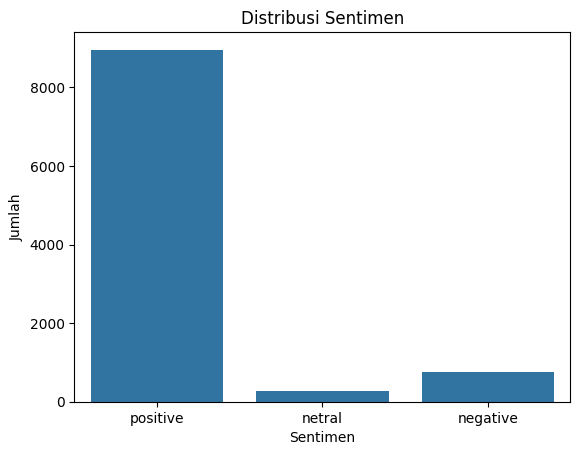

In [ ]:
import seaborn as sns

sns.countplot(data=df, x='rating_category', order=['positive', 'netral', 'negative'])
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
from collections import Counter

def get_top_words_by_sentiment(df, sentiment, n=50):
    filtered_reviews = df[df['rating_category'] == sentiment]['review_preprocessed']
    all_words = ' '.join(filtered_reviews).split()
    counter = Counter(all_words)
    return counter.most_common(n)

print("Top words for positive sentiment:", get_top_words_by_sentiment(df, 'positive'))
print("Top words for neutral sentiment:", get_top_words_by_sentiment(df, 'netral'))
print("Top words for negative sentiment:", get_top_words_by_sentiment(df, 'negative'))


Top words for positive sentiment: [('ajar', 3668), ('bahasa', 3129), ('bagus', 2545), ('sangat', 2427), ('inggris', 1676), ('aplikasi', 1517), ('bantu', 1243), ('banget', 1030), ('seru', 835), ('suka', 519), ('good', 492), ('mudah', 462), ('senang', 450), ('banyak', 416), ('lebih', 388), ('main', 376), ('sekali', 358), ('game', 349), ('keren', 329), ('apk', 306), ('baik', 290), ('guna', 264), ('kasih', 261), ('mula', 257), ('paham', 255), ('anak', 239), ('asing', 236), ('buat', 232), ('iklan', 202), ('terimakasih', 200), ('baguss', 194), ('kata', 193), ('bgt', 188), ('cocok', 187), ('manfaat', 179), ('baru', 173), ('mantap', 162), ('very', 161), ('bikin', 158), ('tambah', 158), ('pokok', 153), ('sini', 151), ('jadi', 150), ('this', 146), ('app', 145), ('luar', 144), ('terima', 143), ('hati', 142), ('lancar', 140), ('orang', 135)]
Top words for neutral sentiment: [('ajar', 104), ('bagus', 102), ('bahasa', 69), ('aplikasi', 60), ('hati', 45), ('lgbt', 42), ('sangat', 37), ('banyak', 35),

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X_lda = vectorizer.fit_transform(df['review_preprocessed'])

lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X_lda)

for idx, topic in enumerate(lda.components_):
    print(f"Top words for topic {idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-50:]])


Top words for topic 0:
['bayar', 'gw', 'jangan', 'seruuu', 'klo', 'manfaat', 'bener', 'tau', 'bangettt', 'udh', 'best', 'baru', 'udah', 'sekarang', 'gitu', 'kurang', 'coba', 'soal', 'pa', 'kasih', 'lebih', 'bahasa', 'gk', 'hari', 'bagusss', 'asik', 'seruu', 'sini', 'bangett', 'inggris', 'game', 'bintang', 'gratis', 'bh', 'main', 'banyak', 'download', 'bikin', 'pokok', 'baguss', 'bgt', 'iklan', 'aplikasi', 'seru', 'suka', 'keren', 'apk', 'ajar', 'bagus', 'banget']
Top words for topic 1:
['kandung', 'thanks', 'pa', 'isi', 'masa', 'bug', 'but', 'duo', 'langgan', 'jangan', 'mohon', 'sayang', 'really', 'in', 'fun', 'bagi', 'dukung', 'application', 'can', 'soal', 'learning', 'baik', 'thank', 'me', 'my', 'jawab', 'malah', 'love', 'language', 'it', 'learn', 'cerita', 'nice', 'lama', 'padahal', 'like', 'udah', 'salah', 'and', 'english', 'so', 'for', 'unsur', 'mantap', 'this', 'very', 'app', 'hati', 'lgbt', 'good']
Top words for topic 2:
['tau', 'moga', 'bosan', 'cara', 'jepang', 'indonesia', 't